In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
import os
#from pandas_profiling import ProfileReport
from pylab import *

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import sem
from numpy.random import seed
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

#figure(figsize=(1,1))

In [3]:
def generate_profile(df):
    '''generate pandas profile'''
 
    profile = ProfileReport(df)   
    profile.to_widgets()
    
    

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    return x, y

In [5]:
df = pd.read_csv('D:\cap\capstone2\data\interim\eda.csv', low_memory=False, index_col=None)

In [6]:
cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE', 'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI',
        'INSTRUCT_IAIR', 'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE', 'ACTU-INST', 'ACTU-IRCV',
        'ACTU-L24H', 'ACTU-L30D', 'ACTU-L90D', 'ACTU-PIC', 'ACTU-TOTL', 'ALL-INSTRUM', 'ALL-IRCV', 'ALL-L24H', 'ALL-L30D',
        'ALL-L90D', 'ALL-PIC', 'ALL-TOTL', 'GLDR-INSTRUCT', 'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D',
        'GLDR-PIC', 'GLDR-TOTL', 'MAKE-INSTRUCT', 'MAKE-IRCV', 'MAKE-L24H', 'MAKE-L30D', 'MAKE-L90D', 'MAKE-PIC',
        'MAKE-TOTL', 'MENG-INSTRUCT', 'MENG-IRCV', 'MENG-L24H', 'MENG-L30D', 'MENG-L90D', 'MENG-PIC', 'MENG-TOTL',
        'NGHT-INSTRUCT', 'NGHT-IRCV', 'NGHT-L24H', 'NGHT-L30D', 'NGHT-L90D', 'NGHT-PIC', 'NGHT-TOTL', 'SENG-INSTRUCT',
        'SENG-IRCV', 'SENG-L24H', 'SENG-L30D', 'SENG-L90D', 'SENG-PIC', 'SENG-TOTL', 'SIMU-TOTL']

In [7]:
def filler(col):
    df[col] = df[col].fillna(0)
    
for c in cols:
    filler(c)

In [8]:
int_cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE', 'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI',
        'INSTRUCT_IAIR', 'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE']

In [9]:
def integer(col):
    df[col] = df[col].astype(int)

In [10]:
integer(int_cols)

In [11]:
#generate_profile(df)

In [12]:
df.head(3)

,idx,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,0,Personnel-Decision making/judgment,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,1,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,2,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


In [13]:
df.drop('idx', axis=1, inplace=True)

D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


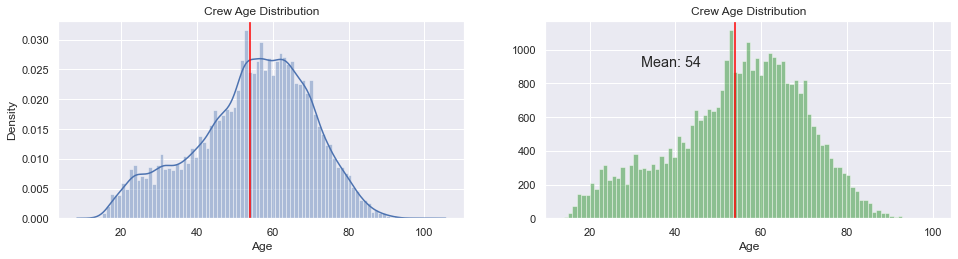

In [14]:
age_u = int(df.crew_age.mean())

sns.set(rc={"figure.figsize": (16, 8)})
plt.title('Crew Age Distribution')
subplot(2,2,1)
ax = sns.distplot(df.crew_age, bins=85, axlabel="Age")
plt.axvline(age_u , color='red')
plt.title('Crew Age Distribution')

subplot(2,2,2)
ax = sns.distplot(df.crew_age, bins=85, kde=False, color='green', axlabel='Age')
plt.axvline(age_u , color='red')
plt.title('Crew Age Distribution')
plt.text(32,900, 'Mean: ' + str(age_u), size='large')

plt.show()


In [15]:
df.crew_age.describe()

count    34900.000000
mean        54.635215
std         15.229651
min         14.000000
25%         45.000000
50%         56.000000
75%         66.000000
max        100.000000
Name: crew_age, dtype: float64

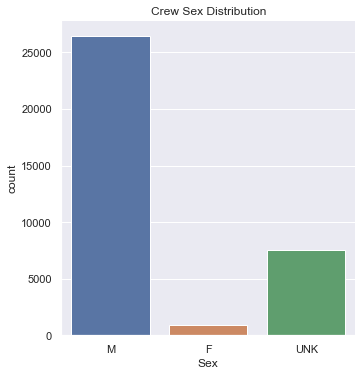

In [16]:
sns.catplot(x="crew_sex", kind="count",  data=df)
plt.title('Crew Sex Distribution')
plt.xlabel("Sex")
plt.show()

In [17]:
df.crew_sex.value_counts()

M      26478
UNK     7503
F        919
Name: crew_sex, dtype: int64

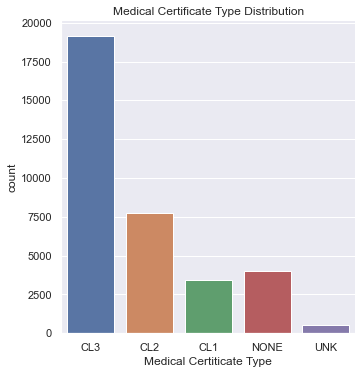

In [18]:
sns.catplot(x="med_certf", kind="count",  data=df)
plt.title('Medical Certificate Type Distribution')
plt.xlabel("Medical Certiticate Type")
plt.show()

In [19]:
df.med_certf.value_counts()

CL3     19146
CL2      7758
NONE     4029
CL1      3440
UNK       527
Name: med_certf, dtype: int64

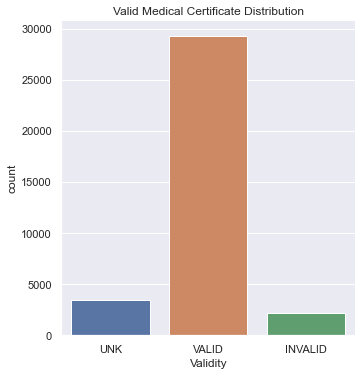

In [20]:
sns.catplot(x="med_crtf_vldty", kind="count",  data=df)
plt.title('Valid Medical Certificate Distribution')
plt.xlabel("Validity")
plt.show()

In [21]:
df.med_crtf_vldty.value_counts()

VALID      29308
UNK         3431
INVALID     2161
Name: med_crtf_vldty, dtype: int64

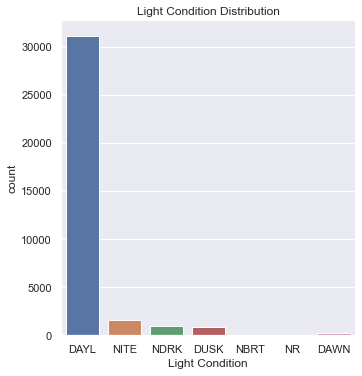

In [22]:
sns.catplot(x="light_cond", kind="count",  data=df)
plt.title('Light Condition Distribution')
plt.xlabel("Light Condition")
plt.show()

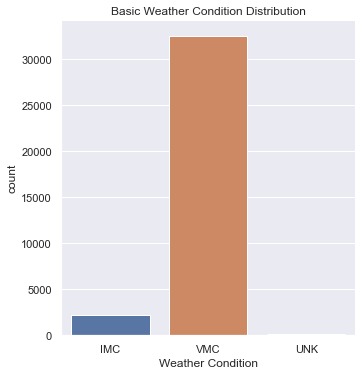

In [23]:
sns.catplot(x="wx_cond_basic", kind="count",  data=df)
plt.title('Basic Weather Condition Distribution')
plt.xlabel("Weather Condition")
plt.show()

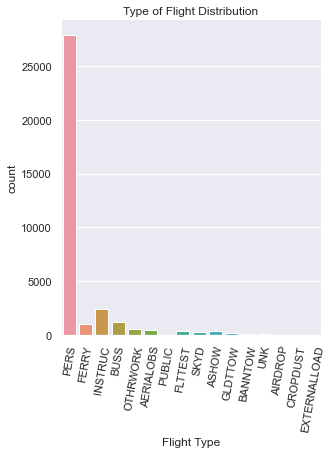

In [24]:
chart = sns.catplot(x="type_fly", kind="count",  data=df)
chart.set_xticklabels(rotation=80)
plt.title('Type of Flight Distribution')
plt.xlabel("Flight Type")
plt.show()

In [25]:
df.type_fly.value_counts()

PERS            27835
INSTRUC          2392
BUSS             1182
FERRY            1032
OTHRWORK          525
AERIALOBS         502
FLTTEST           391
ASHOW             334
SKYD              245
GLDTTOW           178
BANNTOW           134
UNK                54
PUBLIC             44
CROPDUST           21
AIRDROP            14
EXTERNALLOAD       12
Name: type_fly, dtype: int64

## Pilot Certificate Analysis

In [26]:
pilot_cert_cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE']

pilot_cert = df[pilot_cert_cols]
pilot_cert.sample(5)

,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE
7756,0,0,0,0,0,0,1,0,0,0
7215,1,0,1,1,0,0,0,0,0,0
12299,0,0,0,0,0,0,0,0,0,1
30488,0,0,0,0,0,0,1,0,0,0
6366,0,0,0,0,0,0,1,0,0,0


In [27]:
pilot_cert["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']
print('over 1', sum(pilot_cert['result'] > 1))
print('over 2', sum(pilot_cert['result'] >= 2))
print('over 3', sum(pilot_cert['result'] >= 3))
print('over 4', sum(pilot_cert['result'] >= 4))


over 1 3121
over 2 3121
over 3 200
over 4 5


<ipython-input-27-6dc0af63c239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilot_cert["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']


There appears to be some conflicting entries a number of this certificates cannot be held at the same time as one is a higher level that replaces the next lower certificate.

TASK: Run code to retain only the highest certificate level

In [28]:
ATP = df.columns.get_loc('CERT_ATP')
COMM = df.columns.get_loc('CERT_COMM')
PRI = df.columns.get_loc('CERT_PRI')
REC = df.columns.get_loc('CERT_REC')
SPRT = df.columns.get_loc('CERT_SPRT')
STU = df.columns.get_loc('CERT_STU')
NONE = df.columns.get_loc('CERT_NONE')

In [29]:
for i in range(len(df)):
    if df.iloc[i, ATP] == 1:
        df.iloc[i, COMM] = 0
        df.iloc[i, PRI] = 0
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif df.iloc[i, COMM] == 1:
        df.iloc[i, PRI] = 0
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif df.iloc[i, PRI] == 1:
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif ((df.iloc[i, REC] == 1) | (df.iloc[i, SPRT] == 1)):
        df.iloc[i, STU] = 0
        
    if (df.iloc[i, ATP] == 0) & (df.iloc[i, COMM] == 0)  &  (df.iloc[i, PRI] == 0) & (df.iloc[i, REC] == 0) & (df.iloc[i, SPRT] == 0) & (df.iloc[i, STU] == 0):
        df.iloc[i, NONE] = 1
        

In [30]:
df["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']
print('over 1', sum(df['result'] > 1))
print('over 2', sum(df['result'] >= 2))
print('over 3', sum(df['result'] >= 3))
print('over 4', sum(df['result'] >= 4))

over 1 12
over 2 12
over 3 0
over 4 0


The 12 record with double entries are acceptable as these are sport and recreational certificates.

### TASK - CREATE PILOT CERTIFICATION FEATURE

In [31]:
#use colum indexes previously generated

df['pilot_privileges'] = ""

priv = df.columns.get_loc('pilot_privileges')
for i in range(len(df)):
    if df.iloc[i, ATP] == 1:
        df.iloc[i, priv] = 'ATP'
    elif df.iloc[i, COMM] == 1:
        df.iloc[i, priv] = 'COMMERCIAL'
    elif df.iloc[i, PRI] == 1:
        df.iloc[i, priv] = 'PRIVATE'
    elif df.iloc[i, REC] == 1:
        df.iloc[i, priv] = 'SPRT/REC'
    elif df.iloc[i, SPRT] == 1:
        df.iloc[i, priv] = 'SPRT/REC'
    elif df.iloc[i, STU] == 1:
        df.iloc[i, priv] = 'STUDENT'
    elif df.iloc[i, NONE] == 1:
        df.iloc[i, priv] = 'NONE'

In [32]:
print(df.columns)

Index(['event_cause', 'far_part', 'crew_category', 'crew_age', 'crew_sex',
       'med_certf', 'med_crtf_vldty', 'light_cond', 'wx_cond_basic',
       'type_fly', 'CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM',
       'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT',
       'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE',
       'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI', 'INSTRUCT_IAIR',
       'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE',
       'ACTU-INST', 'ACTU-IRCV', 'ACTU-L24H', 'ACTU-L30D', 'ACTU-L90D',
       'ACTU-PIC', 'ACTU-TOTL', 'ALL-INSTRUM', 'ALL-IRCV', 'ALL-L24H',
       'ALL-L30D', 'ALL-L90D', 'ALL-PIC', 'ALL-TOTL', 'GLDR-INSTRUCT',
       'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D', 'GLDR-PIC',
       'GLDR-TOTL', 'MAKE-INSTRUCT', 'MAKE-IRCV', 'MAKE-L24H', 'MAKE-L30D',
       'MAKE-L90D', 'MAKE-PIC', 'MAKE-TOTL', 'MENG-INSTRUCT', 'MENG-IRCV',
       'MENG-L24H', 'MENG-L30D', 'MENG-L90D', 'MENG-PIC', 'MENG-TOT

In [33]:
to_drop = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT','CERT_NONE', 'result',
          'GLDR-INSTRUCT', 'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D', 'GLDR-PIC','GLDR-TOTL',]
df.drop(to_drop, axis=1, inplace=True)

In [34]:
popped = df.pop('pilot_privileges')
df.insert(10, 'pilot_privileges', popped)

In [35]:
df.head()

,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,pilot_privileges,CERT_FORN,CERT_MIL,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,Personnel-Decision making/judgment,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
3,Aircraft oper/perf/capability-Altitude-Not att...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
4,Aircraft oper/perf/capability-(general)-Not at...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


#### Check airplane certs for consistency

In [36]:
ap = df.loc[:,'AP_MEL':'AP_NONE']
ap['result'] = ap['AP_MEL'] + ap['AP_MES'] + ap['AP_SEL'] + ap['AP_SES']


In [37]:
fix = ap[(ap['AP_NONE'] == 1) & (ap['result'] >= 1)]

In [38]:
fix.shape

(0, 6)

Airplane certifications appear consistent.

#### Check Instructor Certification for consistency

In [39]:
Inst = df.loc[:,'INSTRUCT_AME':'INSTRUCT_NONE']
Inst['result'] = Inst['INSTRUCT_AME'] + Inst['INSTRUCT_ASE'] + Inst['INSTRUCT_GLI'] + Inst['INSTRUCT_IAIR'] + Inst['INSTRUCT_SPRT']

In [40]:
fix = Inst[(Inst['INSTRUCT_NONE'] == 1) & (Inst['result'] >= 1)]

In [41]:
fix.shape

(0, 7)

Instructor Certifications appear consisitent

#### Check Intrument Rating for Consistency

In [42]:
I = Inst = df.loc[:,'INSTRUM_APLN':'INSTRUM_NONE']

In [43]:
fix = I[(I['INSTRUM_APLN'] == 1) & (I['INSTRUM_NONE'] == 1)]
fix.shape

(0, 2)

Instrument Certifications appear consisitent

#### IMPUTE TOTAL FLIGHT TIME WITH MAKE FLT TIME IF  MAKE FLT TIME IS LARGER

In [44]:
sense = df[df['MAKE-TOTL'] > df['ALL-TOTL']]
sense.shape

(247, 69)

In [45]:
make_idx = df.columns.get_loc('MAKE-TOTL')
all_idx = df.columns.get_loc('ALL-TOTL')

for i in range(len(df)):
    if df.iloc[i, make_idx] > df.iloc[i, all_idx]:
        df.iloc[i, all_idx] = df.iloc[i, make_idx]

In [46]:
sense = df[df['MAKE-TOTL'] > df['ALL-TOTL']]
sense.shape

(0, 69)

In [47]:
df.shape

(34900, 69)

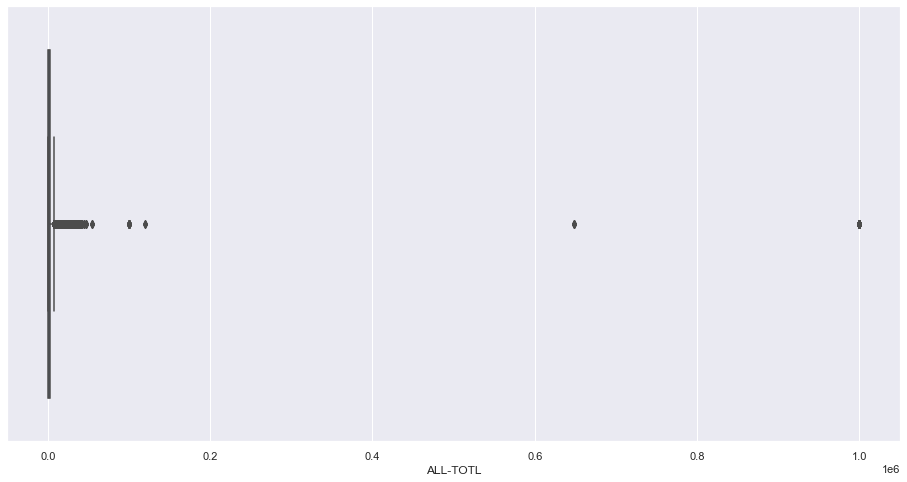

In [48]:
sns.boxplot(x=df['ALL-TOTL'])
plt.show()

#### Remove Outliers on the High end of Total Flight Time

In [49]:
Q1 = df['ALL-TOTL'].quantile(0.25)
Q3 = df['ALL-TOTL'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~(df['ALL-TOTL'] > (Q3 + 1.5 * IQR))]
df.shape

2749.5


(30774, 69)

#### Check for Privideges minimum Hours and impute minimums if not met

### ATP

In [50]:
low_atp = df[(df['pilot_privileges'] == 'ATP') & (df['ALL-TOTL'] < 1500)]
low_atp.shape

(107, 69)

In [51]:
def impute_time(priv, ALL, INSTRUM, PIC, NIGHT):
    ''' impute minimum times based on certificate held and its minimums'''
    
    #view number of troubled records
    low_atp = df[(df['pilot_privileges'] == priv) & (df['ALL-TOTL'] < ALL)]
    print(priv, " ", int(low_atp.shape[0]))
    
    
    all_idx = df.columns.get_loc('ALL-TOTL')
    pic_idx = df.columns.get_loc('ALL-PIC')
    intrum_idx = df.columns.get_loc('ALL-INSTRUM')
    priv_idx = df.columns.get_loc('pilot_privileges')
    night_idx = df.columns.get_loc('NGHT-TOTL')
    
    for i in range (len(df)):
        if (df.iloc[i, priv_idx] == priv):
            if df.iloc[i, all_idx] < ALL:
                df.iloc[i, all_idx] = ALL
            if df.iloc[i, pic_idx] < PIC:
                df.iloc[i, pic_idx] = PIC
            if df.iloc[i, intrum_idx] < INSTRUM:
                df.iloc[i, intrum_idx] = INSTRUM
            if df.iloc[i, night_idx] < NIGHT:
                df.iloc[i, night_idx] = NIGHT    
    
    #Chec trouble records left      
    low_atp = df[(df['pilot_privileges'] == priv) & (df['ALL-TOTL'] < ALL)]
    print('Fixed ', priv, " ", int(low_atp.shape[0]))      
            

In [52]:
impute_time ('ATP', 1500, 75, 250, 100)
impute_time ('COMMERCIAL', 250, 10, 100, 5)
impute_time ('PRIVATE', 50, 3, 15, 3)
impute_time ('SPRT/REC', 20, 0, 5, 0)

ATP   107


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  ATP   0
COMMERCIAL   301


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  COMMERCIAL   0
PRIVATE   512


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  PRIVATE   0
SPRT/REC   90


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  SPRT/REC   0


In [53]:
df.sample(10)

,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,pilot_privileges,CERT_FORN,CERT_MIL,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
21577,Personnel-Decision making/judgment,91,PILOT,66,M,CL2,VALID,DAYL,VMC,FLTTEST,COMMERCIAL,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,100.0,4500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3873,Personnel-Incorrect Action,91,PILOT,50,M,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,10.0,20.0,60.0,100.0,0.0,0.0,1.0,10.0,20.0,60.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19949,Personnel-Aircraft control,91,PILOT,67,UNK,CL3,VALID,DAYL,VMC,PERS,ATP,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,75.0,0.0,0.0,4.0,5.0,1860.0,2790.0,0.0,0.0,0.0,2.0,3.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,200.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,4.0,5.0,175.0,200.0,224.0
5515,Aircraft oper/perf/capability-Pitch control-No...,91,PILOT,57,M,CL3,VALID,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,273.0,3.0,0.0,0.0,5.0,9.0,1350.0,1459.0,0.0,0.0,0.0,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,203.0,0.0,0.0,0.0,5.0,9.0,0.0,1403.0,0.0
19742,Personnel-Aircraft control,91,PILOT,45,UNK,CL2,VALID,DAYL,VMC,PERS,COMMERCIAL,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.5,57.8,57.8,10.0,0.0,1.4,9.7,23.2,895.2,982.0,0.0,0.0,1.4,9.7,23.2,700.2,700.2,0.0,0.0,0.0,0.0,0.0,16.5,23.4,0.0,0.0,0.0,0.0,0.5,110.0,113.2,3.3,0.0,1.4,9.7,23.2,867.9,929.3,39.7
11450,Aircraft structures-(general)-Failure,91,PILOT,67,M,CL3,VALID,DAYL,VMC,PERS,SPRT/REC,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22699,Enviro-Object/animal/substance,91,PILOT,25,UNK,CL3,VALID,NITE,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,6.0,63.0,125.0,0.0,0.0,0.0,2.0,6.0,26.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0,2.0,6.0,63.0,125.0,3.0
3691,Personnel-Non-Compliace with Guidance,91,PILOT,64,M,NONE,UNK,DAYL,VMC,PERS,SPRT/REC,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20564,Aircraft oper/perf/capability-Surface speed/br...,91,PILOT,51,UNK,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,8.0,25.0,15.0,116.0,0.0,0.0,0.0,8.0,25.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,8.0,25.0,0.0,116.0,0.0
27731,Aircraft systems-Main landing gear-Failure,91,PILOT,78,M,CL2,VALID,DAYL,VMC,FLTTEST,ATP,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,12.0,24.0,1800.0,2089.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


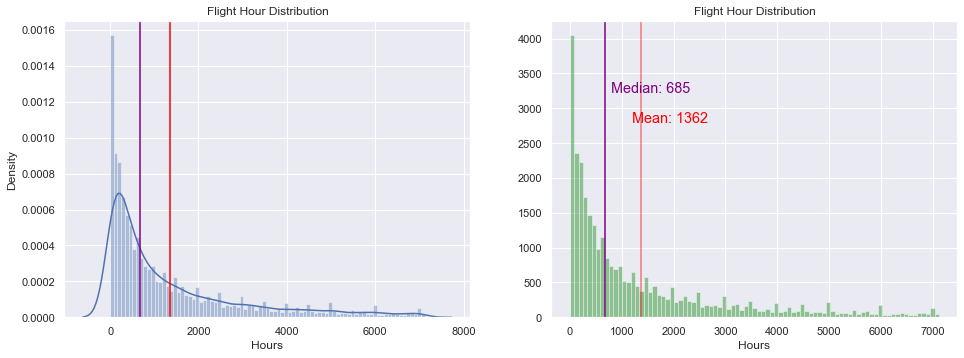

In [54]:
total_time_u = int(df['ALL-TOTL'].mean())
total_time_pm = int(df['ALL-TOTL'].median())

sns.set(rc={"figure.figsize": (16, 12)})
plt.title('Total Flight Hour Distribution')
subplot(2,2,1)
ax = sns.distplot(df['ALL-TOTL'], bins=85, axlabel="Hours")
plt.axvline(total_time_u, color='red')
plt.axvline(total_time_pm, color='purple')
plt.title('Flight Hour Distribution')

subplot(2,2,2)
ax = sns.distplot(df['ALL-TOTL'], bins=85, kde=False, color='green', axlabel='Hours')
plt.axvline(total_time_u, color='red', alpha = 0.5)
plt.title('Flight Hour Distribution')
plt.axvline(total_time_pm, color='purple')
plt.text(1200,2800, 'Mean: ' + str(total_time_u), size='large', color = 'red')
plt.text(800,3220, 'Median: ' + str(total_time_pm ), size='large', color='purple')
plt.show()

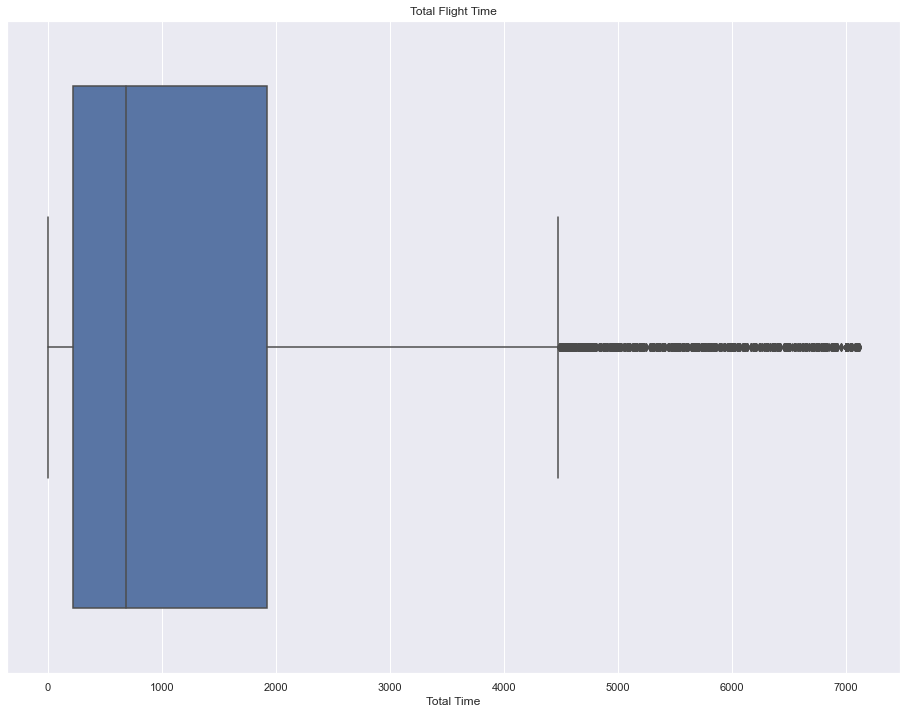

In [55]:
sns.boxplot(x=df['ALL-TOTL'])
plt.title('Total Flight Time')
plt.xlabel('Total Time')
plt.show()

In [56]:
events = df.event_cause.value_counts()
events.to_csv('D:\cap\capstone2\data\interim\cause_count.csv')
events

Personnel-Aircraft control                                                   4390
Enviro-Wind                                                                  1842
Enviro-Object/animal/substance                                               1840
Aircraft oper/perf/capability-Directional control-Not attained/maintained    1768
Personnel-Incorrect Action                                                   1734
                                                                             ... 
Aircraft systems-AC power distribution system-Failure                           1
Fluids/misc hardware-Misc wiring-Incorrect service/maintenance                  1
Aircraft power plant-(general)-Design                                           1
Aircraft structures-Attach fittings (on wing)-Capability exceeded               1
Aircraft systems-Emergency locator beacon-Not specified                         1
Name: event_cause, Length: 1135, dtype: int64

In [57]:
top_5 = ['Personnel-Aircraft control', 'Enviro-Wind', 'Enviro-Object/animal/substance', 
       'Aircraft oper/perf/capability-Directional control-Not attained/maintained', 'Personnel-Incorrect Action']

In [58]:
df_top = df[df.event_cause.isin(top_5)]
df_top.shape

(11574, 69)

### TOTAL FLIGHT TIME

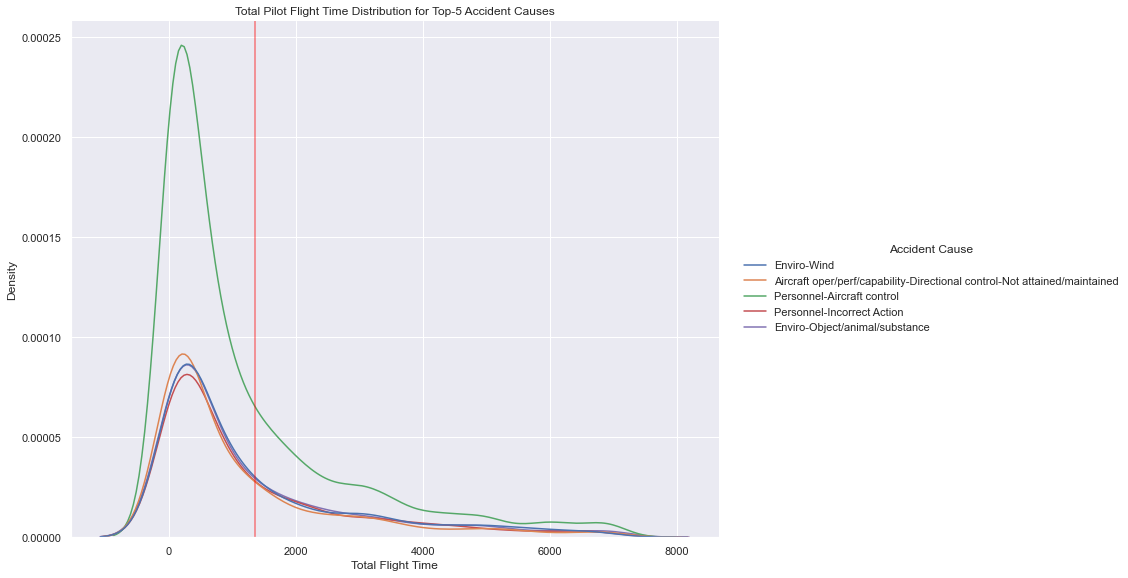

In [59]:
g = sns.displot(df_top, x='ALL-TOTL', hue='event_cause', kind='kde', height=8, aspect=1.3)
g._legend.set_title('Accident Cause')
plt.xlabel('Total Flight Time')
plt.title('Total Pilot Flight Time Distribution for Top-5 Accident Causes')
plt.axvline(total_time_u, color='red', alpha = 0.5)
plt.show()

In [60]:
u = int(df['ALL-TOTL'].mean())
print("POP MEAN: ", str(u))

m = int(df['ALL-TOTL'].median())
print("POP MEDIAN: ", str(m))

o = int(np.std(df['ALL-TOTL']))
print('POP STD: ', o)

POP MEAN:  1362
POP MEDIAN:  685
POP STD:  1616


In [61]:
causes = {}
cause_counts = df['event_cause'].value_counts().to_dict()
for k, val in cause_counts.items():
    #include only incidents with at least 75 data points
    if val > 75: 
        causes[k] = val

In [62]:
diff_means = {}
i = 0 
for c in causes:
    temp_df = df[df['event_cause'] == c]
    mean = int(temp_df['ALL-TOTL'].mean())
    median = int(temp_df['ALL-TOTL'].median())
    diff_means[i] = [c, mean, median]  
    i = i+1

In [63]:
mean_diff = pd.DataFrame.from_dict(diff_means, orient='index')
mean_diff.columns = ['cause', 'mean', 'median']
mean_diff['pop_mean'] = u
mean_diff['pop_median'] = m
mean_diff['diff_mean'] = mean_diff['mean'] - mean_diff['pop_mean']
mean_diff['diff_median'] = mean_diff['median'] - mean_diff['pop_median']
mean_diff = mean_diff [['cause', 'pop_mean', 'mean', 'diff_mean', 'pop_median', 'median', 'diff_median']]
sorted_mean = mean_diff.sort_values('diff_mean', ascending=False)
sorted_mean.head(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
23,Personnel-Non-Compliace with Guidance,1362,1844,482,685,1092,407
37,Personnel-Installation,1362,1803,441,685,1091,406
34,Personnel-Identification/recognition,1362,1777,415,685,937,252


In [64]:
sorted_mean.tail(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
17,Personnel-Limited Experience for Conditions,1362,689,-673,685,275,-410
15,Aircraft oper/perf/capability-Landing flare-No...,1362,671,-691,685,177,-508
27,Personnel-Qualification/certification,1362,518,-844,685,95,-590


In [65]:
sorted_median = mean_diff.sort_values('diff_median', ascending=False)
sorted_median.head(5)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
46,Personnel-AC Modification/Repair,1362,1743,381,685,1154,469
23,Personnel-Non-Compliace with Guidance,1362,1844,482,685,1092,407
37,Personnel-Installation,1362,1803,441,685,1091,406
42,Aircraft oper/perf/capability-Directional cont...,1362,1647,285,685,1057,372
8,Personnel-Monitoring other aircraft,1362,1736,374,685,1050,365


In [66]:
sorted_median.tail(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
25,Aircraft oper/perf/capability-Landing flare-In...,1362,692,-670,685,205,-480
15,Aircraft oper/perf/capability-Landing flare-No...,1362,671,-691,685,177,-508
27,Personnel-Qualification/certification,1362,518,-844,685,95,-590


In [67]:
item1 = sorted_mean.iloc[0,0]
item2 = sorted_mean.iloc[-1,0]
print(item1)
print(item2)
causer1 = df[df['event_cause']==item1]
causer2 = df[df['event_cause']==item2]

Personnel-Non-Compliace with Guidance
Personnel-Qualification/certification


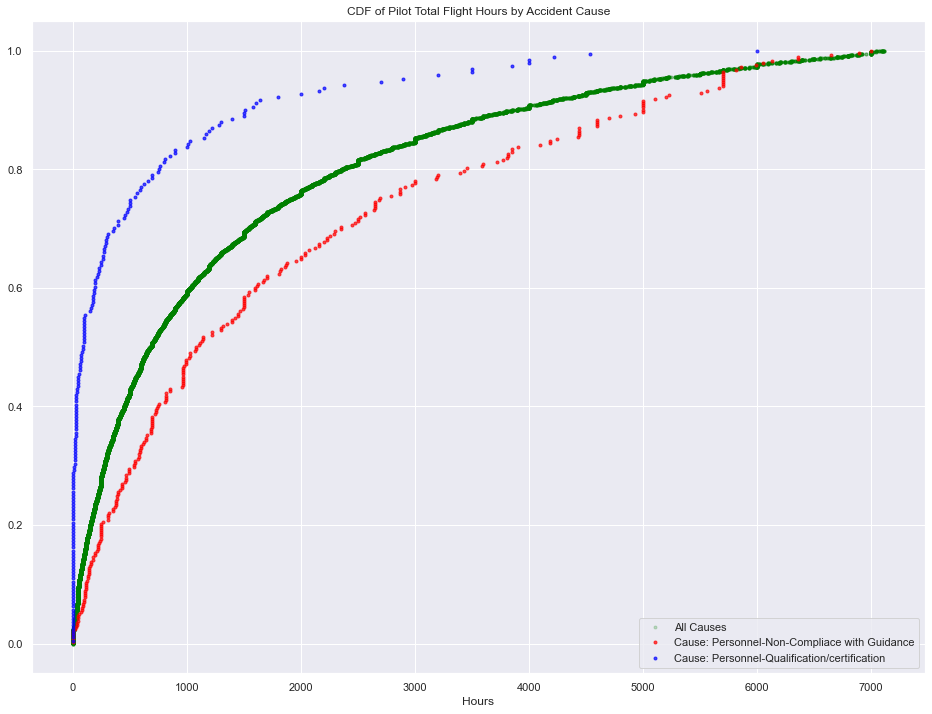

In [68]:
x_pop, y_pop = ecdf(df['ALL-TOTL'])
x_cause1, y_cause1 = ecdf(causer1['ALL-TOTL'])
x_cause2, y_cause2 = ecdf(causer2['ALL-TOTL'])
plt.plot(x_pop, y_pop, marker = '.', linestyle = 'none', color='green', alpha=0.2, label = 'All Causes')
plt.plot(x_cause1, y_cause1, marker = '.', linestyle = 'none', color='red', alpha=0.7, label = 'Cause: ' + item1)
plt.plot(x_cause2, y_cause2, marker = '.', linestyle = 'none', color='blue', alpha=0.7, label = 'Cause: ' + item2)
plt.legend(loc='lower right')
plt.title('CDF of Pilot Total Flight Hours by Accident Cause')
plt.xlabel('Hours')
plt.show()

In [69]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [70]:
def bootstrapper (item, data, func, func_name='***', size=10000):
    cause_reps = draw_bs_reps(data1, func, size)
    sem = np.std(data) / np.sqrt(len(data))
    print ('SEM: ', str(round(sem,2)))
    bs_std = np.std(cause_reps)
    print('STD: ' + str(round(bs_std,2)) ) 
    plt.hist(cause_reps, bins=50, density=True)
    plt.xlabel('Bootstraped ' + func_name + ' for Cause: ' + item)
    plt.ylabel('PDF')
    plt.show()
    
    return cause_reps

Personnel-Non-Compliace with Guidance
SEM:  108.28
STD: 108.21


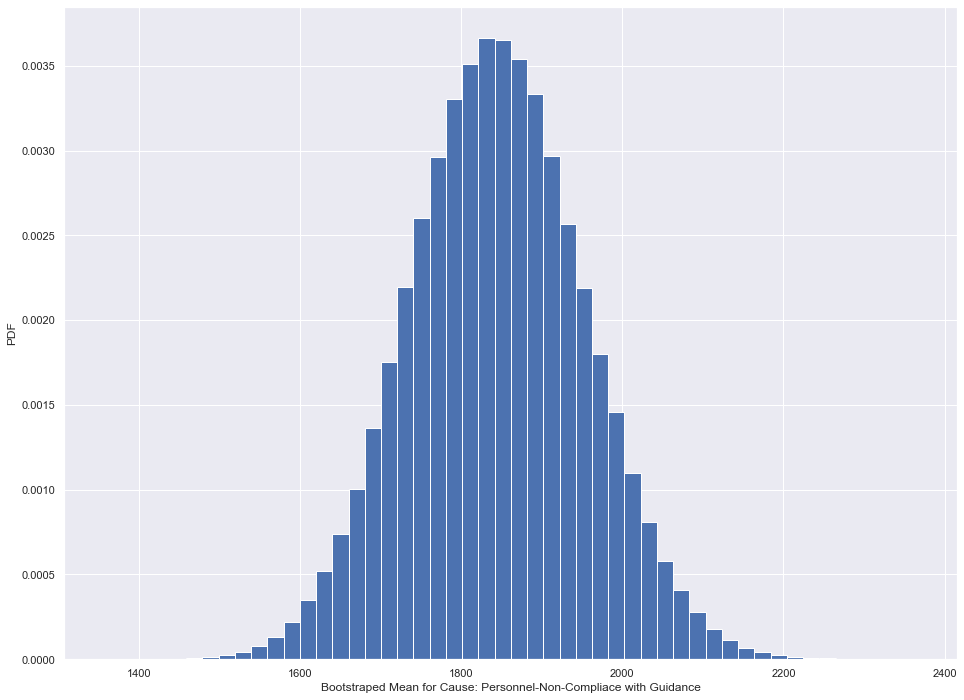

500000


In [71]:
print(item1)
data1 = df[df['event_cause'] == item1]['ALL-TOTL']
name = 'Mean'
a = bootstrapper(item1, data1, np.mean, name, 500000)
print(len(a))

Personnel-Qualification/certification
SEM:  70.94
STD: 108.22


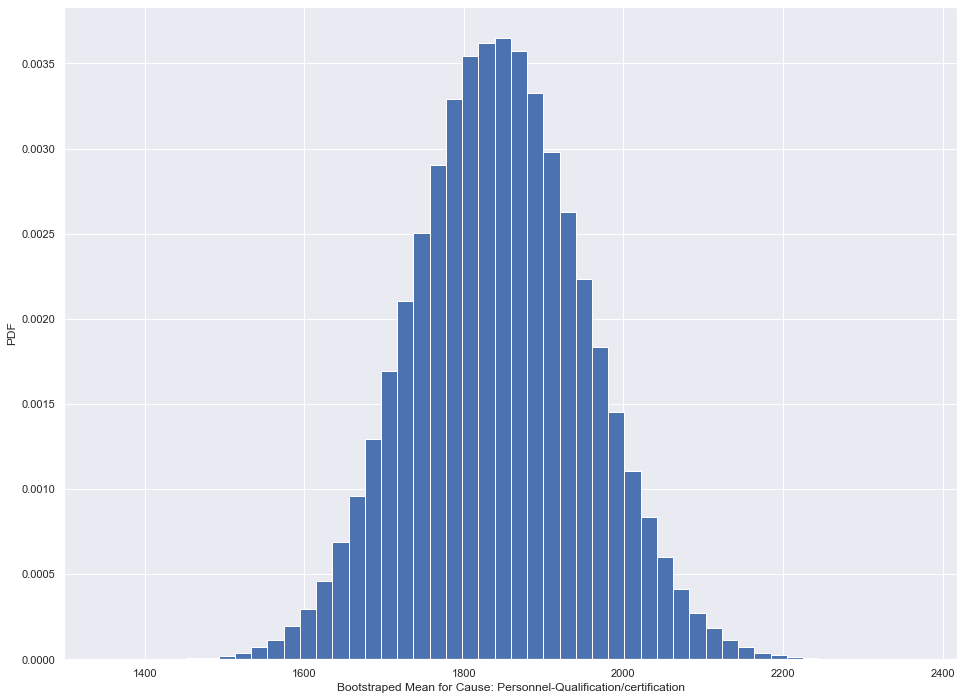

500000


In [72]:
print(item2)
data2 = df[df['event_cause'] == item2]['ALL-TOTL']
name = 'Mean'
b = bootstrapper(item2, data2, np.mean, name, 500000)
print(len(b))

## Hypothesis Testing

#### Null Hypothesis - There is not difference in mean total flight time between pilots involved in different accident causes.

#### Alternate Hypothesis - There is a difference in mean total flight time between pilots involved in different accident causes.

In [73]:
t, p = ttest_ind(a,b)
print('t-statistic: ' + str(round(t,2)))
print('p-value: ' + str(round(p,2)))

t-statistic: 1.07
p-value: 0.28


### Conclusion: with an alpha of 0.05 and a p-value of 0.28 the Null Hypothesis cannot be rejected. There is little to no difference in the mean total flight time between pilots involved in different accident causes.

# ____________________________________________________________

# CREW AGE

D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Crew Age Distribution')

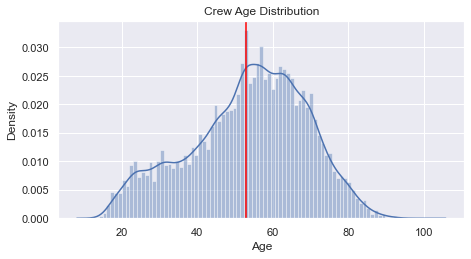

In [74]:
age_u = int(df.crew_age.mean())

sns.set(rc={"figure.figsize": (16, 8)})
plt.title('Crew Age Distribution')
subplot(2,2,1)
ax = sns.distplot(df.crew_age, bins=85, axlabel="Age")
plt.axvline(age_u , color='red')
plt.title('Crew Age Distribution')


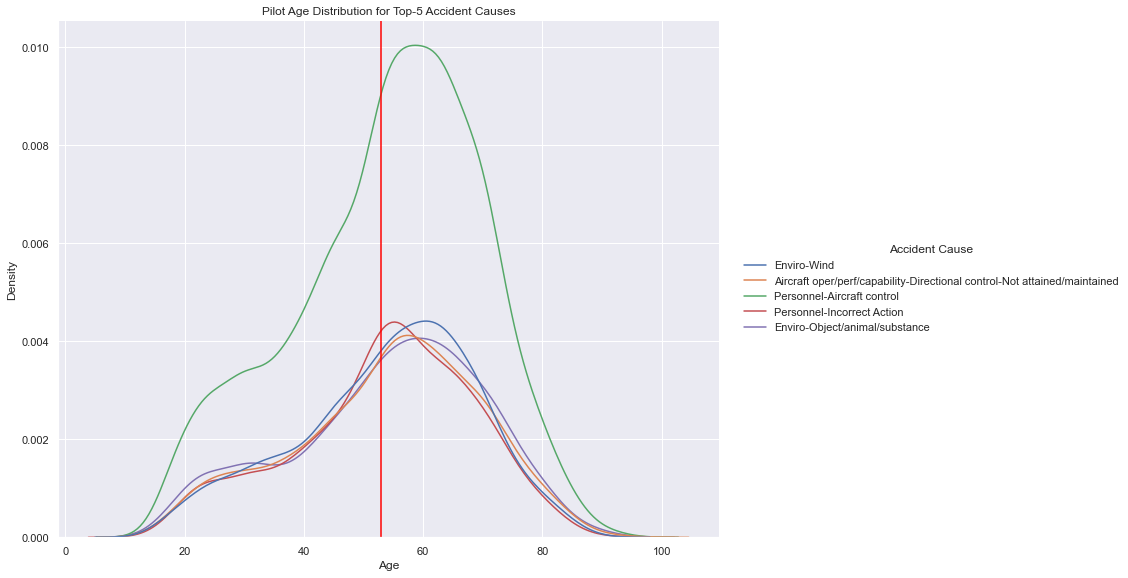

In [75]:
g = sns.displot(df_top, x='crew_age', hue='event_cause', kind='kde', height=8, aspect=1.3)
g._legend.set_title('Accident Cause')
plt.xlabel('Age')
plt.title('Pilot Age Distribution for Top-5 Accident Causes')
plt.axvline(age_u , color='red')
plt.show()

In [76]:
u = int(df['crew_age'].mean())
print("POP MEAN: ", str(u))

m = int(df['crew_age'].median())
print("POP MEDIAN: ", str(m))

o = int(np.std(df['crew_age']))
print('POP STD: ', o)

POP MEAN:  53
POP MEDIAN:  55
POP STD:  15


In [77]:
causes = {}
cause_counts = df['event_cause'].value_counts().to_dict()
for k, val in cause_counts.items():
    #include only incidents with at least 75 data points
    if val > 75: 
        causes[k] = val

In [78]:
#causes = list(df['event_cause'].unique())
diff_means = {}
i = 0 
for c in causes:
    temp_df = df[df['event_cause'] == c]
    mean = int(temp_df['crew_age'].mean())
    median = int(temp_df['crew_age'].median())
    diff_means[i] = [c, mean, median]  
    i = i+1

In [79]:
mean_diff = pd.DataFrame.from_dict(diff_means, orient='index')
mean_diff.columns = ['cause', 'mean', 'median']
mean_diff['pop_mean'] = u
mean_diff['pop_median'] = m
mean_diff['diff_mean'] = mean_diff['mean'] - mean_diff['pop_mean']
mean_diff['diff_median'] = mean_diff['median'] - mean_diff['pop_median']
mean_diff = mean_diff [['cause', 'pop_mean', 'mean', 'diff_mean', 'pop_median', 'median', 'diff_median']]
sorted_mean = mean_diff.sort_values('diff_mean', ascending=False)
sorted_mean.head(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
20,Aircraft oper/perf/capability-Descent/approach...,53,58,5,55,59,4
39,Personnel-Attention,53,57,4,55,61,6
38,Aircraft oper/perf/capability-Lateral/bank con...,53,56,3,55,58,3


In [80]:
sorted_mean.tail(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
25,Aircraft oper/perf/capability-Landing flare-In...,53,50,-3,55,53,-2
48,Personnel-Communication Hyndered,53,50,-3,55,51,-4
47,Aircraft oper/perf/capability-Climb rate-Not a...,53,49,-4,55,51,-4


In [81]:
item1 = sorted_mean.iloc[0,0]
item2 = sorted_mean.iloc[-1,0]
print(item1)
print(item2)
causer1 = df[df['event_cause']==item1]
causer2 = df[df['event_cause']==item2]

Aircraft oper/perf/capability-Descent/approach/glide path-Not attained/maintained
Aircraft oper/perf/capability-Climb rate-Not attained/maintained


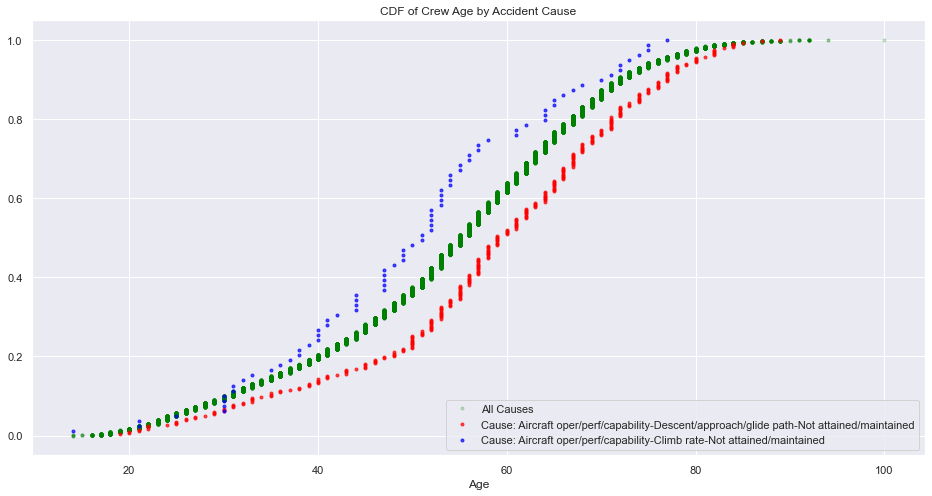

In [82]:
x_pop, y_pop = ecdf(df['crew_age'])
x_cause1, y_cause1 = ecdf(causer1['crew_age'])
x_cause2, y_cause2 = ecdf(causer2['crew_age'])
plt.plot(x_pop, y_pop, marker = '.', linestyle = 'none', color='green', alpha=0.2, label = 'All Causes')
plt.plot(x_cause1, y_cause1, marker = '.', linestyle = 'none', color='red', alpha=0.7, label = 'Cause: ' + item1)
plt.plot(x_cause2, y_cause2, marker = '.', linestyle = 'none', color='blue', alpha=0.7, label = 'Cause: ' + item2)
plt.legend(loc='lower right')
plt.title('CDF of Crew Age by Accident Cause')
plt.xlabel('Age')
plt.show()

Aircraft oper/perf/capability-Descent/approach/glide path-Not attained/maintained
SEM:  0.82
STD: 0.82


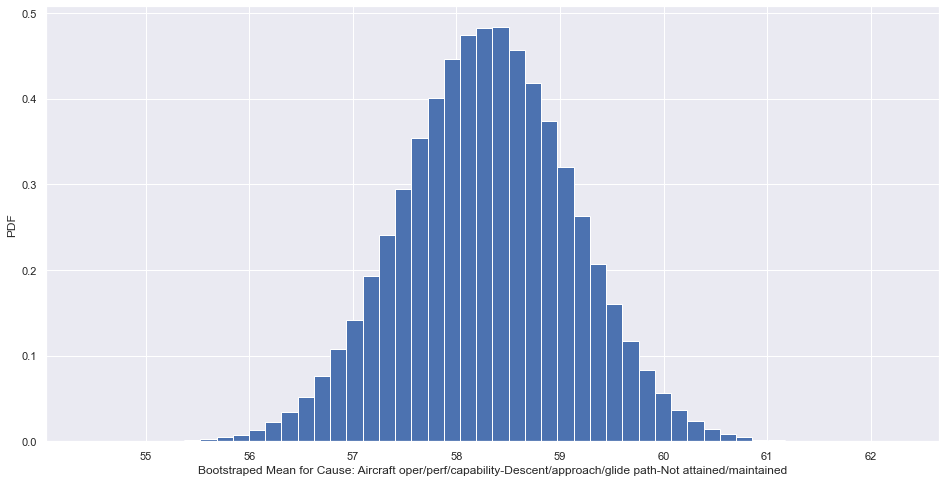

500000


In [83]:
print(item1)
data1 = df[df['event_cause'] == item1]['crew_age']
name = 'Mean'
a = bootstrapper(item1, data1, np.mean, name, 500000)
print(len(a))

Aircraft oper/perf/capability-Climb rate-Not attained/maintained
SEM:  1.59
STD: 0.82


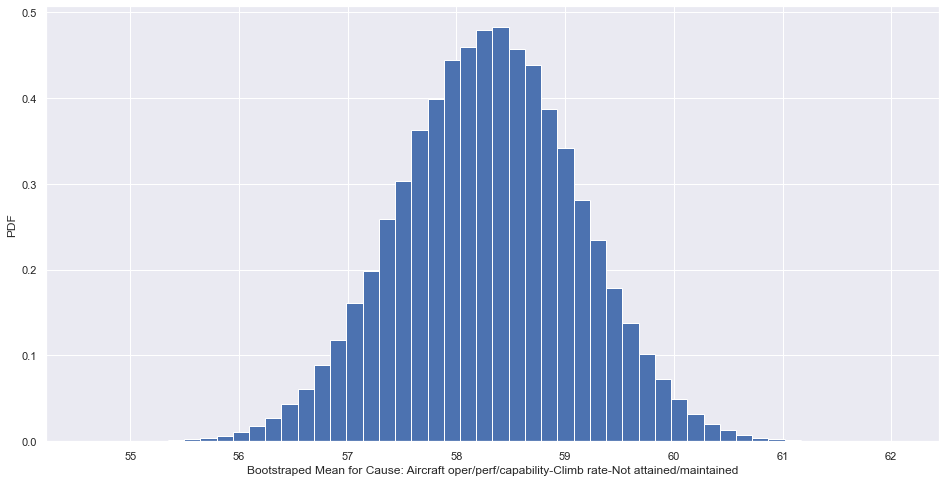

500000


In [84]:
print(item2)
data2 = df[df['event_cause'] == item2]['crew_age']
name = 'Mean'
b = bootstrapper(item2, data2, np.mean, name, 500000)
print(len(b))


## Hypothesis Testing

#### Null Hypothesis - There is not difference in age between pilots involved in different accident causes.

#### Alternate Hypothesis - There is a difference in age between pilots involved in different accident causes.

In [86]:
t, p = ttest_ind(a,b)
print('t-statistic: ' + str(round(t,2)))
print('p-value: ' + str(round(p,2)))

t-statistic: -0.58
p-value: 0.56


### Conclusion: with an alpha of 0.05 and a p-value of 0.56 the Null Hypothesis cannot be rejected. There is little to no difference in the mean total flight time between pilots involved in different accident causes.

# Pilot Priviledge

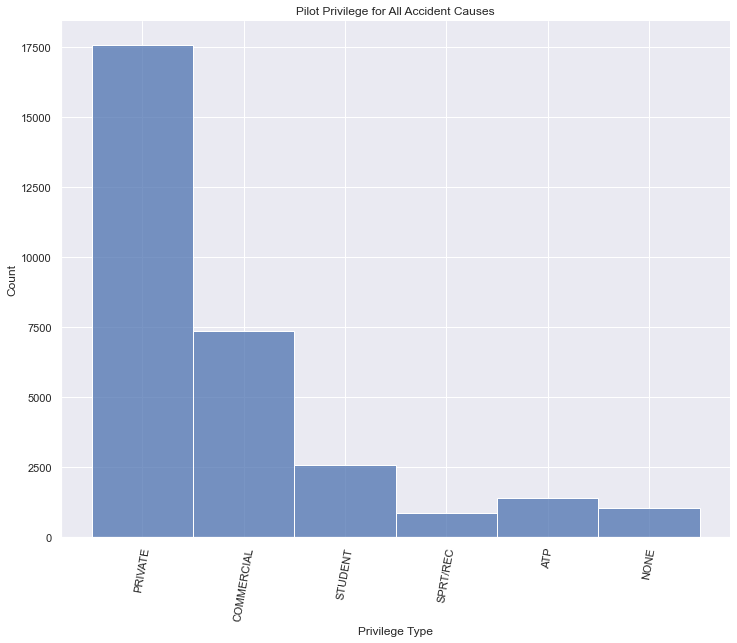

In [106]:

g = sns.displot(df, x='pilot_privileges', height=8, aspect = 1.3)
plt.xlabel('Privilege Type')
plt.title('Pilot Privilege for All Accident Causes')
g.set_xticklabels(rotation=80)
plt.show()

In [104]:
df_top1 = df[df.event_cause.isin(['Personnel-Aircraft control'])]
df_top1.shape

(4390, 69)

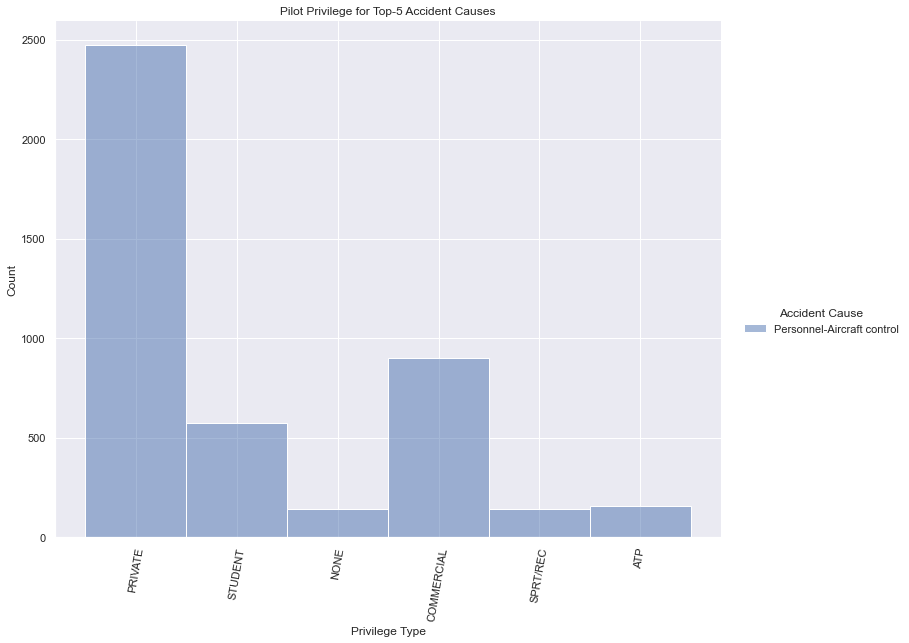

In [105]:
g = sns.displot(df_top1, x='pilot_privileges',  hue='event_cause', height=8, aspect = 1.3)
g._legend.set_title('Accident Cause')
plt.xlabel('Privilege Type')
plt.title('Pilot Privilege for Top-5 Accident Causes')
g.set_xticklabels(rotation=80)
plt.show()

In [107]:
df.head()

,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,pilot_privileges,CERT_FORN,CERT_MIL,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,Personnel-Decision making/judgment,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
3,Aircraft oper/perf/capability-Altitude-Not att...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
4,Aircraft oper/perf/capability-(general)-Not at...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


### Investigate proportions

In [239]:
def set_proportions(df, privilege, group_name):
    n = len(df)
    df_inner = df[df['pilot_privileges']==privilege]
    num = len(df_inner)
    print(group_name + ' ' + privilege + ' proportion : ' + str(round(num/n,2)))
    

In [240]:
set_proportions(df, 'PRIVATE', 'Population')
set_proportions(df_top1, 'PRIVATE', 'Accident Subset')

set_proportions(df, 'COMMERCIAL', 'Population')
set_proportions(df_top1, 'COMMERCIAL', 'Accident Subset')

set_proportions(df, 'STUDENT', 'Population')
set_proportions(df_top1, 'STUDENT', 'Accident Subset')

set_proportions(df, 'NONE', 'Population')
set_proportions(df_top1, 'NONE', 'Accident Subset')

set_proportions(df, 'ATP', 'Population')
set_proportions(df_top1, 'ATP', 'Accident Subset')


set_proportions(df, 'SPRT/REC', 'Population')
set_proportions(df_top1, 'SPRT/REC', 'Accident Subset')




Population PRIVATE proportion : 0.57
Accident Subset PRIVATE proportion : 0.56
Population COMMERCIAL proportion : 0.24
Accident Subset COMMERCIAL proportion : 0.21
Population STUDENT proportion : 0.08
Accident Subset STUDENT proportion : 0.13
Population NONE proportion : 0.03
Accident Subset NONE proportion : 0.03
Population ATP proportion : 0.04
Accident Subset ATP proportion : 0.04
Population SPRT/REC proportion : 0.03
Accident Subset SPRT/REC proportion : 0.03


In [264]:
causes = {}
cause_counts = df['event_cause'].value_counts().to_dict()
for k, val in cause_counts.items():
    #include only incidents with at least 75 data points
    if val > 75: 
        causes[k] = val




privilege = list(df['pilot_privileges'].unique())

props = {}
i=0
for c, val in causes.items():
    temp_df = df[df['event_cause'] == c]
    n = len(temp_df)
     
    
    for p in privilege:
        p_df = temp_df[temp_df['pilot_privileges']==p]
        num = len(p_df)

        props[i] = [ c, p, round(num/n, 2)]
        i += 1
    
 

In [266]:
prop_diff = pd.DataFrame.from_dict(props, orient='index')
prop_diff.columns=['cause', 'privilege', 'cause_prop']
prop_diff['pop_prop'] = 0.0
for i in range(len(prop_diff)):
    if prop_diff.iloc[i,1] ==  "COMMERCIAL":
        prop_diff.iloc[i,3] = 0.24
    if prop_diff.iloc[i,1] ==  "STUDENT":
        prop_diff.iloc[i,3] = 0.08
    if prop_diff.iloc[i,1] ==  "NONE":
        prop_diff.iloc[i,3] = 0.03
    if prop_diff.iloc[i,1] ==  "ATP":
        prop_diff.iloc[i,3] = 0.04
    if prop_diff.iloc[i,1] ==  "SPRT/REC":
        prop_diff.iloc[i,3] = 0.03
    if prop_diff.iloc[i,1] ==  "PRIVATE":
        prop_diff.iloc[i,3] = 0.57    
        
  
    
prop_diff['diff'] =  prop_diff['cause_prop'] -  prop_diff['pop_prop']             
      

In [267]:
prop_diff.sort_values('diff', ascending=False)

,cause,privilege,cause_prop,pop_prop,diff
167,Personnel-Qualification/certification,NONE,0.47,0.03,0.44
92,Aircraft oper/perf/capability-Landing flare-No...,STUDENT,0.32,0.08,0.24
152,Aircraft oper/perf/capability-Landing flare-In...,STUDENT,0.32,0.08,0.24
174,Personnel-Spatial disorientation,PRIVATE,0.77,0.57,0.20
258,Personnel-Weather planning/Awareness,PRIVATE,0.73,0.57,0.16
60,Enviro-Ceiling/visibility/precip,PRIVATE,0.72,0.57,0.15
169,Personnel-Scheduled/routine maintenance / Inspec,COMMERCIAL,0.37,0.24,0.13
194,Aircraft oper/perf/capability-Pitch control-No...,STUDENT,0.18,0.08,0.10
114,Enviro-Light condition,PRIVATE,0.66,0.57,0.09
104,Personnel-Limited Experience for Conditions,STUDENT,0.17,0.08,0.09


In [272]:
eight = prop_diff[prop_diff['diff'] < 0.80][['cause', 'diff']]
sorted = dict(eight.sort_values('diff', ascending=False))
sorted

{'cause': 167                Personnel-Qualification/certification
 92     Aircraft oper/perf/capability-Landing flare-No...
 152    Aircraft oper/perf/capability-Landing flare-In...
 174                     Personnel-Spatial disorientation
 258                 Personnel-Weather planning/Awareness
 60                      Enviro-Ceiling/visibility/precip
 169     Personnel-Scheduled/routine maintenance / Inspec
 194    Aircraft oper/perf/capability-Pitch control-No...
 114                               Enviro-Light condition
 104          Personnel-Limited Experience for Conditions
 270                     Enviro-Airport facilities/design
 157                       Personnel-Preflight inspection
 120    Aircraft oper/perf/capability-Descent/approach...
 264         Aircraft power plant-(general)-Not specified
 145                     Personnel-Monitoring environment
 245                 Personnel-Flight planning/navigation
 20     Aircraft oper/perf/capability-Directional cont...
 252 

In [296]:
cause = prop_diff[prop_diff.cause.isin(['Aircraft oper/perf/capability-Landing flare-Not attained/maintained'])]
cause

,cause,privilege,cause_prop,pop_prop,diff,z_crit
90,Aircraft oper/perf/capability-Landing flare-No...,PRIVATE,0.50,0.57,-0.07,-1.644854
91,Aircraft oper/perf/capability-Landing flare-No...,COMMERCIAL,0.12,0.24,-0.12,-1.644854
92,Aircraft oper/perf/capability-Landing flare-No...,STUDENT,0.32,0.08,0.24,-1.644854
93,Aircraft oper/perf/capability-Landing flare-No...,SPRT/REC,0.05,0.03,0.02,-1.644854
94,Aircraft oper/perf/capability-Landing flare-No...,ATP,0.00,0.04,-0.04,-1.644854
95,Aircraft oper/perf/capability-Landing flare-No...,NONE,0.02,0.03,-0.01,-1.644854


In [297]:
n = prop_diff['cause'].isin(['Aircraft oper/perf/capability-Landing flare-Not attained/maintained']).count()
n


294

## Hypothesis Testing

#### Null Hypothesis - The proportion sudents involved in all accidents is equal to the proportion of students involved in a landing flare accident.
                                             P = 0.08

#### Alternate Hypothesis - The proportion sudents involved in all accidents is not equal to the proportion of students involved in a landing flare accident.¶

                                             p != 0.08
                                             
Alpha = 0.05                                             

In [305]:
a = 0.05
z_crit = norm.ppf(a)

In [307]:
prop_diff['z_crit'] = z_crit
prop_diff

,cause,privilege,cause_prop,pop_prop,diff,z_crit
0,Personnel-Aircraft control,PRIVATE,0.56,0.57,-0.01,-1.644854
1,Personnel-Aircraft control,COMMERCIAL,0.21,0.24,-0.03,-1.644854
2,Personnel-Aircraft control,STUDENT,0.13,0.08,0.05,-1.644854
3,Personnel-Aircraft control,SPRT/REC,0.03,0.03,0.00,-1.644854
4,Personnel-Aircraft control,ATP,0.04,0.04,0.00,-1.644854
5,Personnel-Aircraft control,NONE,0.03,0.03,0.00,-1.644854
6,Enviro-Wind,PRIVATE,0.60,0.57,0.03,-1.644854
7,Enviro-Wind,COMMERCIAL,0.23,0.24,-0.01,-1.644854
8,Enviro-Wind,STUDENT,0.08,0.08,0.00,-1.644854
9,Enviro-Wind,SPRT/REC,0.04,0.03,0.01,-1.644854


In [313]:
priv_counter={}
privs = dict(df['pilot_privileges'].value_counts())  
privs 

{'PRIVATE': 17565,
 'COMMERCIAL': 7342,
 'STUDENT': 2579,
 'ATP': 1378,
 'NONE': 1041,
 'SPRT/REC': 869}

In [310]:
for i in range(len(prop_diff)):
    prop_diff['n'] = df['pilot_privileges'].isin([prop_diff.iloc[i,1]]).count()
    
prop_diff    

,cause,privilege,cause_prop,pop_prop,diff,z_crit,n
0,Personnel-Aircraft control,PRIVATE,0.56,0.57,-0.01,-1.644854,30774
1,Personnel-Aircraft control,COMMERCIAL,0.21,0.24,-0.03,-1.644854,30774
2,Personnel-Aircraft control,STUDENT,0.13,0.08,0.05,-1.644854,30774
3,Personnel-Aircraft control,SPRT/REC,0.03,0.03,0.00,-1.644854,30774
4,Personnel-Aircraft control,ATP,0.04,0.04,0.00,-1.644854,30774
5,Personnel-Aircraft control,NONE,0.03,0.03,0.00,-1.644854,30774
6,Enviro-Wind,PRIVATE,0.60,0.57,0.03,-1.644854,30774
7,Enviro-Wind,COMMERCIAL,0.23,0.24,-0.01,-1.644854,30774
8,Enviro-Wind,STUDENT,0.08,0.08,0.00,-1.644854,30774
9,Enviro-Wind,SPRT/REC,0.04,0.03,0.01,-1.644854,30774


In [ ]:
def z_func (p_hat, p, n):
    z = (p_hat - p) / (np.sqrt((p * (1-p)) / n))
    return z

In [304]:
prop_diff['z_crit'] = z_crit

p_hat = prop_diff['cause_prop']
p = prop_diff['pop_prop']
n = df['pilot_privileges'].isin(prop_diff['privilege']).count()


prop_diff['z'] = prop_diff['z'].apply(z_func(p_hat, p, n))

if prop_diff['z'] > prop_diff['z_crit']:
    prop_diff["Hypothesis"] = 'Reject'
else:
    prop_diff["Hypothesis"] = 'Do not Reject'


KeyError: 'z'